In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np

# The classical statistical inference pipeline

1. Formulate the Hypothesis
2. Design Experiment
3. Collect Data
4. Inference/Conclusion

# A/B Testing

An A/B test is an experiment with two groups to establish which of two treatments, products, procedures, or the like is superior.

# Key Terms for A/B Testing

- Treatment

Something (drug, price, web headline) to which a subject is exposed.

- Treatment group

A group of subjects exposed to a specific treatment.

- Control group

A group of subjects exposed to no (or standard) treatment.

- Randomization

The process of randomly assigning subjects to treatments.

- Subjects

The items (web visitors, patients, etc.) that are exposed to treatments.

- Test statistic

The metric used to measure the effect of the treatment.

# Example

In [3]:
# Data
filepath="/content/drive/MyDrive/Data Science/data/Class-11/web_page_data.csv"
data=pd.read_csv(filepath)
data

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67
5,Page B,0.85
6,Page A,2.11
7,Page B,2.46
8,Page A,1.32
9,Page B,1.49


Text(0.5, 0.98, '')

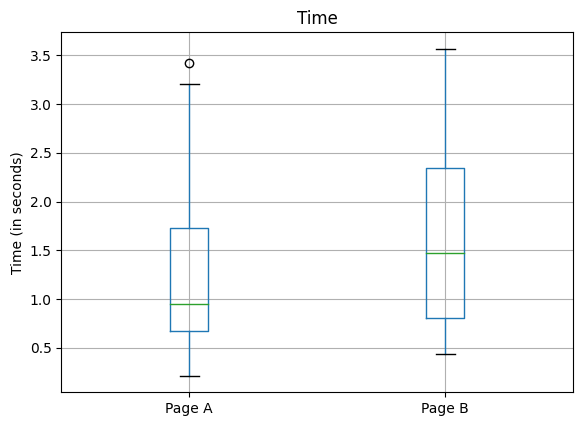

In [4]:
ax = data.boxplot(by='Page', column='Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

# Other Examples of A/B Testing 

- Testing two soil treatments to determine which produces better seed germination
- Testing two therapies to determine which suppresses cancer more effectively
- Testing two prices to determine which yields more net profit
- Testing two web headlines to determine which produces more clicks
- Testing two web ads to determine which generates more conversions

# Hypothesis Tests

In a properly designed A/B test, you collect data on treatments A and B in such a way
that any observed difference between A and B must be due to either:

- Random chance in assignment of subjects
- A true difference between A and B

# Key Terms

- Null Hypothesis

A baseline assumption that the treatments are equivalent, and any difference between the groups is due to chance. This baseline assumption is termed the null hypothesis.

- Alternative Hypothesis

Hypothesis tests by their nature involve not just a null hypothesis but also an offset‐
ting alternative hypothesis. Here are some examples:

1.  Null = “no difference between the means of group A and group B”; alternative = “A is different from B” (could be bigger or smaller)

2. Null = “A ≤ B”; alternative = “A > B”

3. Null = “B is not X% greater than A”; alternative = “B is X% greater than A”


- One-way (or one-tail) hypothesis test

Only one independent variable

Example : Checking shoe brand (Nike, Adidas, Saucony, Hoka) has any effect on race finish times in a marathon.

- Two-way (or two-tail) hypothesis test

Two independent varibles

Example :  Checking shoe brand (Nike, Adidas, Saucony, Hoka) and runner age group (junior, senior, master’s) have any effect on race finishing times in a marathon.


# Example

- Null Hypothesis

"no difference between the mean time spent on page A and page B"

- Alternative Hypothesis

"Mean time spent on page B is greater than mean time spent on page A"


Is this test One-way or Two-way?

The page is the only independent variable so this is one way hypothesis test.


In [5]:
# Difference 
mean_a=data[data['Page'] == 'Page A'].Time.mean()
mean_b=data[data['Page'] == 'Page B'].Time.mean()
print(mean_a)
print(mean_b)
mean_b - mean_a

# is page B is better than page A? What if the difference is by chance?

1.2633333333333332
1.62


0.3566666666666669

# Resampling

Drawing additional samples (“resamples”) from an observed data set.

There are two main resampling procedures;

- Bootstrap

- Permutation


# Permutation Test


Steps to perform permutation test,

1. Combine the results from the different groups into a single data set.

2. Shuffle the combined data and then randomly draw (without replacement) a resample of the same size as group A (clearly it will contain some data from the other groups).

3. From the remaining data, randomly draw (without replacement) a resample of the same size as group B.

4. Do the same for groups C, D, and so on. You have now collected one set of resamples that mirror the sizes of the original samples.

5. Whatever statistic or estimate was calculated for the original samples (e.g., difference in group proportions), calculate it now for the resamples, and record; this constitutes one permutation iteration.

6. Repeat the previous steps R times to yield a permutation distribution of the test statistic.

In [6]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()

nA=21
nB=15
perm_diffs = [perm_fun(data["Time"], nA, nB) for _ in range(1000)]

Text(0, 0.5, 'Frequency')

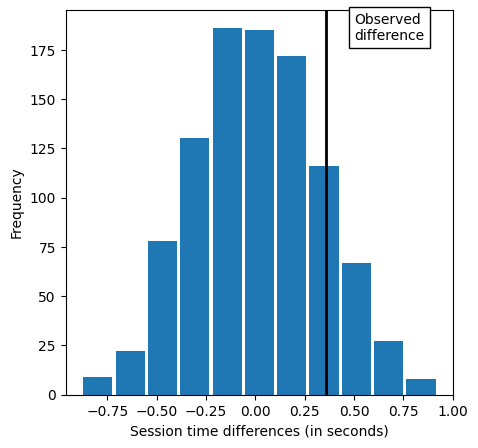

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)

ax.axvline(x = mean_b - mean_a, color='black', lw=2)

ax.text(0.5, 180, 'Observed\ndifference',bbox={'facecolor':'white'})

ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')


In [9]:
tmp=perm_diffs > mean_b - mean_a
print(tmp.sum())
np.mean(tmp)
# 128/1000=0.128

142


0.142

# was the difference by chance?

Yes. Since above percentage of total permutation is small, the difference between mean time spent on page B and page A is by chance. 